In [11]:
from google.colab import drive
drive.mount('./drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at ./drive


## Data PreProcessing 

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
import os
from keras.utils import to_categorical

Using TensorFlow backend.


In [0]:
X_train = np.load('drive/My Drive/dataset/X_train.npy')
Y_train = np.load('drive/My Drive/dataset/y_train.npy')

In [0]:
os.mkdir('images')  #--making directory for storing the reshaped images
 
for i in range(X_train.shape[0]):
    img = X_train[i].reshape(50,37)
    filename = 'images'+'/train_Img_'+ str(i+1) + '.png'
    plt.imsave(filename,img)
    
    
#-- changing the dimensions of images from 50x37 to 224x224
train_imgs = os.listdir('images')
reshaped_train_imgs = []

for img_name in train_imgs:
    file_dir = 'images/' + img_name
    img = image.load_img(file_dir,target_size=(224,224))
    img = image.img_to_array(img)
    reshaped_train_imgs.append(img)

In [17]:
reshaped_train_imgs[0].shape

(224, 224, 3)

In [0]:
train_x = np.stack(reshaped_train_imgs)  #--stacking up all images into batches
train_y = to_categorical(Y_train)

In [19]:
print(train_x.shape)
print(train_y.shape)

(966, 224, 224, 3)
(966, 7)


## Training 

In [0]:
from keras.layers import Dense,Flatten,Input,Conv2D,BatchNormalization,MaxPool2D
from keras.models import Sequential

In [16]:
model = Sequential()

model.add(Conv2D(filters=64,kernel_size=[3,3],activation='relu',input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'))

model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=[3,3],activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'))

model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=[3,3],activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'))

model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=[3,3],activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'))

model.add(BatchNormalization())
model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=7,activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
history = model.fit(x=train_x, y=train_y, batch_size=64, epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
966/966 [==============================] - 247s 256ms/step - loss: 2.4870 - acc: 0.2909
Epoch 2/10
966/966 [==============================] - 242s 251ms/step - loss: 1.6036 - acc: 0.4244
Epoch 3/10
966/966 [==============================] - 244s 252ms/step - loss: 1.3334 - acc: 0.5104
Epoch 4/10
966/966 [==============================] - 243s 252ms/step - loss: 1.0746 - acc: 0.6087
Epoch 5/10
966/966 [==============================] - 243s 252ms/step - loss: 0.7960 - acc: 0.7184
Epoch 6/10
966/966 [==============================] - 243s 251ms/step - loss: 0.5748 - acc: 0.8106
Epoch 7/10
966/966 [==============================] - 243s 252ms/step - loss: 0.3933 - acc: 0.8820
Epoch 8/10
966/966 [==============================] - 242s 250ms/step - loss: 0.2072 - acc: 0.9524
Epoch 9/10
966/966 [==============================] - 242s 251ms/step - loss: 0.1248 - acc: 0.9834
Epoch 10/10
966/966 [==============================] - 242s 2

In [0]:
labels = Y_train.reshape(len(Y_train),1)

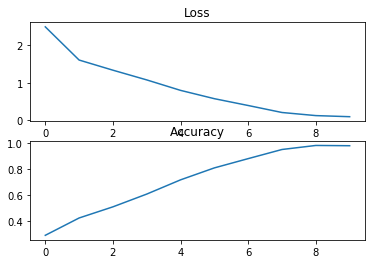

In [22]:
from matplotlib import pyplot

pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label=labels[:,0])

# pyplot.plot(history.history['val_loss'], label='test')
# pyplot.legend()


# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['acc'], label=labels[:,0])

# pyplot.plot(history.history['val_acc'], label='test')
# pyplot.legend()
pyplot.show()

## Saving Weights and Architecture of trained Model

In [0]:
model.save_weights('drive/My Drive/dataset/model_weights.hdf5')

model_yaml = model.to_yaml()  #--Serialize the Yaml

with open('drive/My Drive/dataset/model_arch.yaml','w') as yaml_file:  #--saving the architecture of model
    yaml_file.write(model_yaml)